In [1]:
%%capture  
# import libraries
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# create file paths & read csv files
file_path = Path("Resources/market_data_modified_k.csv")
mkt_data = pd.read_csv(file_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
file_path = Path("Resources/gdp_data_new_k.csv")
gdp_data = pd.read_csv(file_path,index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# display market index data
mkt_data.head(2)

,S&P500,Gold,DJIA,NASDAQ,10_Year
Date,,,,,
1971-01-01,95.879997,37.868,93.490000,118.870003,6.09
1971-02-01,96.750000,38.716,101.339996,125.379997,6.14


In [4]:
# check data types
mkt_data.dtypes

S&P500     float64
Gold       float64
DJIA       float64
NASDAQ     float64
10_Year    float64
dtype: object

In [5]:
gdp_data.head(2)

,GDP
Date,
1971-01-01,1135.156000
1971-02-01,1142.194333


In [6]:
gdp_data.dtypes

GDP    float64
dtype: object

In [7]:
# concatenate GDP with Indices
joined_data = pd.concat([mkt_data, gdp_data], axis="columns", join="inner")
joined_data.tail()

,S&P500,Gold,DJIA,NASDAQ,10_Year,GDP
Date,,,,,,
2020-03-01,2584.590088,1593.764,7700.100098,21917.16016,0.698,20200.45567
2020-04-01,2912.429932,1680.030,8889.549805,24345.72070,0.622,19520.11400
2020-05-01,3044.310059,1715.697,9489.870117,25383.10938,0.648,20065.95433
2020-06-01,3100.290039,1734.032,10058.769530,25812.88086,0.653,20611.79467
2020-07-01,3271.120117,1840.807,10745.269530,26428.32031,0.536,21157.63500


In [8]:
# check for nulls
joined_data.isnull().sum()

S&P500     0
Gold       0
DJIA       0
NASDAQ     0
10_Year    0
GDP        0
dtype: int64

# Option One GDP VS Indeces
## Example Using Gold as a predictor of GDP
Linear Regressions

In [9]:
model = smf.ols('Gold ~ GDP', data=joined_data)
model = model.fit()

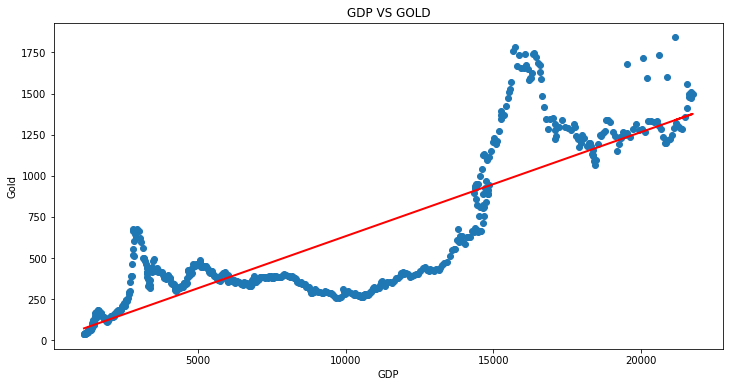

In [10]:
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(joined_data['GDP'], joined_data['Gold'], 'o')           # scatter plot showing actual data
plt.plot(joined_data['GDP'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('GDP')
plt.ylabel('Gold')
plt.title('GDP VS GOLD')

plt.show()

In [11]:
new_X = 20000
model.predict({"GDP": new_X})

0    1265.567245
dtype: float64

# Option 2  GDP VS Indices
## Example Using Gold as a predictor of GDP
using from sklearn.linear_model import LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using Gold, DJIA, S&P500 and NASDAQ as predictors
# Split data into predictors X and output Y
predictors = ['Gold']
X = joined_data[predictors]
y = joined_data['GDP']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [13]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2542.3809867194605
betas = [11.40082932]


In [14]:
model.predict(X)

array([ 2974.10759154,  2983.7754948 ,  2985.56542501,  2987.02473116,
        3004.03476851,  2999.61124673,  3009.0055301 ,  3029.44721707,
        3020.9421984 ,  3026.60841057,  3030.81531659,  3037.80402497,
        3062.71483704,  3092.32279079,  3092.90423309,  3101.31804513,
        3163.72618484,  3251.17054575,  3289.7965555 ,  3305.29028255,
        3290.14998121,  3281.42834678,  3257.50940686,  3269.51448014,
        3284.88279806,  3385.7117326 ,  3501.24773696,  3573.48339156,
        3700.96746505,  3908.20033966,  3914.6304074 ,  3753.4340816 ,
        3717.05403523,  3681.5860552 ,  3621.41247803,  3753.55949072,
        4013.39579183,  4252.50538523,  4461.11776019,  4506.09403187,
        4407.19183749,  4298.2569133 ,  4164.52518534,  4302.23580274,
        4271.43076191,  4349.78866185,  4611.43769482,  4636.51951933,
        4558.77726417,  4589.43409422,  4574.04297464,  4481.27442643,
        4449.65992672,  4414.96720309,  4422.00151478,  4402.63150576,
      

 # Option 3 GDP VS ETF'S

In [15]:
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path

from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

from MCForecastTools import MCSimulation
from pylab import rcParams

In [16]:
file_path = Path("Resources/gdp_data_new_k.csv")
gdp_data = pd.read_csv(file_path, index_col="Date")

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [17]:
timeframe = "1D"

start_date = pd.Timestamp("2015-11-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-01", tz="America/New_York").isoformat()


tickers = ["SPY","DIA","QQQ","GLD","IEF","GDP"]

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index=df_ticker.index.date
df_ticker.head(2)

DIA                                      GDP                 \
              open    high     low   close   volume    open    high    low   
2015-11-09  178.50  178.60  166.12  166.66  6152095  0.6700  0.6800  0.630   
2015-11-10  166.24  177.86  166.00  177.79  4037226  0.6578  0.6598  0.594   

                              ...     QQQ                                    \
             close    volume  ...    open    high     low   close    volume   
2015-11-09  0.6374  344908.0  ...  111.31  111.45  109.85  110.55  26242607   
2015-11-10  0.5984  982160.0  ...  109.96  110.37  109.63  110.27  23772240   

               SPY                                    
              open    high     low   close    volume  
2015-11-09  209.31  209.49  206.95  208.06  96626934  
2015-11-10  207.50  208.60  207.19  208.51  60954178  

[2 rows x 30 columns]

In [18]:
# Create and empty DataFrame for closing prices
closing_prices = pd.DataFrame()

# Pick AGG and SPY close prices
closing_prices["DIA"] = df_ticker["DIA"]["close"]
closing_prices["GDP"] = df_ticker["GDP"]["close"]
closing_prices["QQQ"] = df_ticker["QQQ"]["close"]
closing_prices["GLD"] = df_ticker["GLD"]["close"]
closing_prices["IEF"] = df_ticker["IEF"]["close"]
closing_prices["SPY"] = df_ticker["SPY"]["close"]
closing_prices.dropna(inplace=True)

In [19]:
closing_prices.isnull().sum()

DIA    0
GDP    0
QQQ    0
GLD    0
IEF    0
SPY    0
dtype: int64

In [20]:
closing_prices.tail(2)

,DIA,GDP,QQQ,GLD,IEF,SPY
2020-10-29,266.52,9.895,276.23,175.41,120.465,329.99
2020-10-30,265.08,9.740,269.71,176.20,120.080,326.53


In [21]:
model1 = smf.ols('GDP ~ GLD', data=closing_prices)
model1 = model1.fit()

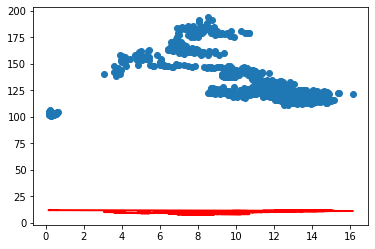

In [22]:
sales_pred = model1.predict()

# Plot regression against actual data
# plt.figure(figsize=(12, 6))
plt.plot(closing_prices['GDP'], closing_prices['GLD'], 'o')           # scatter plot showing actual data
plt.plot(closing_prices['GDP'], sales_pred, 'r', linewidth=2)   # regression line
# plt.xlabel('GDP')
# plt.ylabel('Gold')
# plt.title('GDP VS GOLD')

plt.show()

# Option 4  

In [23]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using ETF's as predictors
# Split data into predictors X and output Y
predictors = ['GLD','QQQ','SPY','IEF','DIA']
X = closing_prices[predictors]
y = closing_prices['GDP']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [24]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 44.76473647971501
betas = [ 0.08595624  0.03174247 -0.13916689 -0.45781633  0.15018339]


In [25]:
model.predict(X)

array([ 5.16163831,  6.65233269,  5.04587245,  5.00753239,  4.78431428,
        6.29472441,  6.22722728,  6.25703771,  6.26909541,  4.72102978,
        4.58157599,  6.12185313,  6.05524832,  5.85770833,  5.91624279,
        5.74850893,  5.8054431 ,  6.3773706 ,  4.91177862,  6.19585321,
        6.13104377,  6.10385422,  4.75767661,  4.44706842,  6.21824951,
        6.31518634,  6.48999378,  6.10931756,  6.07086024,  6.13312127,
        4.80564863,  4.81945246,  4.85579026,  4.78179263,  6.53455124,
        5.00094671,  6.35052776,  4.76858201,  4.76926685,  6.00148388,
        4.62323404,  5.82635614,  5.97626292,  5.72282749,  5.57449161,
        8.92624258,  8.05786319,  7.98770855,  8.02823085,  8.51771399,
        8.45178564,  8.63590137,  7.88783715,  7.93791637,  9.04665566,
        8.15134122,  8.884256  ,  8.88064669,  8.10365688,  8.81411197,
        8.81416467,  8.78758533,  7.95311262,  8.9086718 ,  8.09675883,
        8.03973143,  8.06548331,  7.87030395,  7.90642528,  8.71